In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools as at

In [2]:
#from Functions_for_steer import *

# Section 1 - Steer CSF by Threshold

## 1.1 - Define Functions for Threshold Steer

In [3]:
save_dir = '/eos/user/e/elsweene/SWAN_projects/Filtered_data_sets/'

In [4]:
## Load in CSF data

Zoom_in_CSF = pd.read_csv(save_dir + "Zoom_in_CSF_Data_filtered.csv")

In [5]:
## Assign arrays to columns to allow indexing

Time_CSF_array = np.array(Zoom_in_CSF['TimeStamp'])    
f0_array_threshold = np.array(Zoom_in_CSF['f0'])

In [32]:
## Define funcction to fit line 

def fit_line(Array_of_interest1,Array_of_interest2,index):
    
    m,b = np.polyfit(Array_of_interest1[0:index],-1*Array_of_interest2[0:index], 1)
    
    return m,b

In [42]:
## Define function to do threshold steer

def Threshold_steer(threshold_f,Range):

    f0_array_threshold1 = np.array(Zoom_in_CSF['f0'])

    for i in Range:
        
        if f0_array_threshold1[i] > threshold_f:

            m,b = fit_line(Time_CSF_array,-1*f0_array_threshold1,i)     ## fit to section of data 
            step_f0_th = m*(Time_CSF_array[i]) + b   

            f0_array_threshold1[i:] -= step_f0_th

        else :
            f0_array_threshold1[i:] = f0_array_threshold1[i:]
            
    
    return f0_array_threshold1

In [14]:
## Define function to calculate Allan Deviation and plot

def Allan_Dev(y,rate,t) : 
    
    (t, ad1, ade, adn) = at.oadev(y, rate, data_type="freq",taus=t)
    
    return plt.loglog(t,ad1,'o',label='Threshold Steer')

## 1.2 Steer and Plot

### 1.12  fit to 6 hours

In [43]:
## Define Range for loop

range_6 = np.arange(1,890,1)

In [44]:
threshold100 = Threshold_steer(1e-14,range_6)

/tmp/ipykernel_662/2305513021.py:11: RankWarning: Polyfit may be poorly conditioned
  m,b = fit_line(Time_CSF_array,-1*f0_array_threshold1,i)     ## fit to section of data


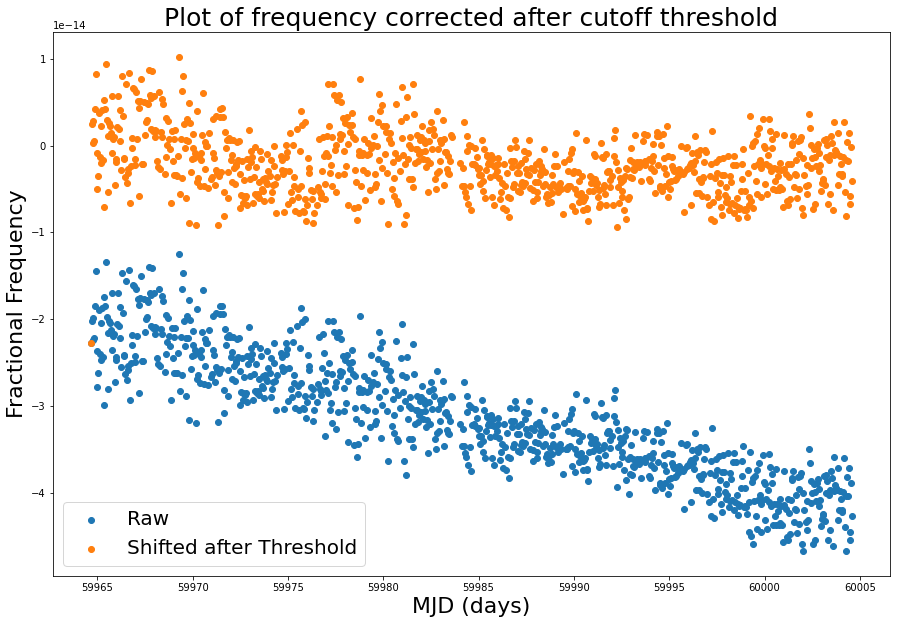

In [47]:
plt.figure(figsize=(15,10))

plt.scatter(Zoom_in_CSF['TimeStamp'],-1*Zoom_in_CSF['f0'],label='Raw')
plt.scatter(Time_CSF_array,-1*threshold100,label='Shifted after Threshold')

plt.xlabel('MJD (days)',fontsize=22)
plt.ylabel('Fractional Frequency',fontsize=22)
plt.title('Plot of frequency corrected after cutoff threshold',fontsize=25)
plt.legend(loc=3,fontsize=20)

## 1.3 - Calculate Allan Deviation and Plot

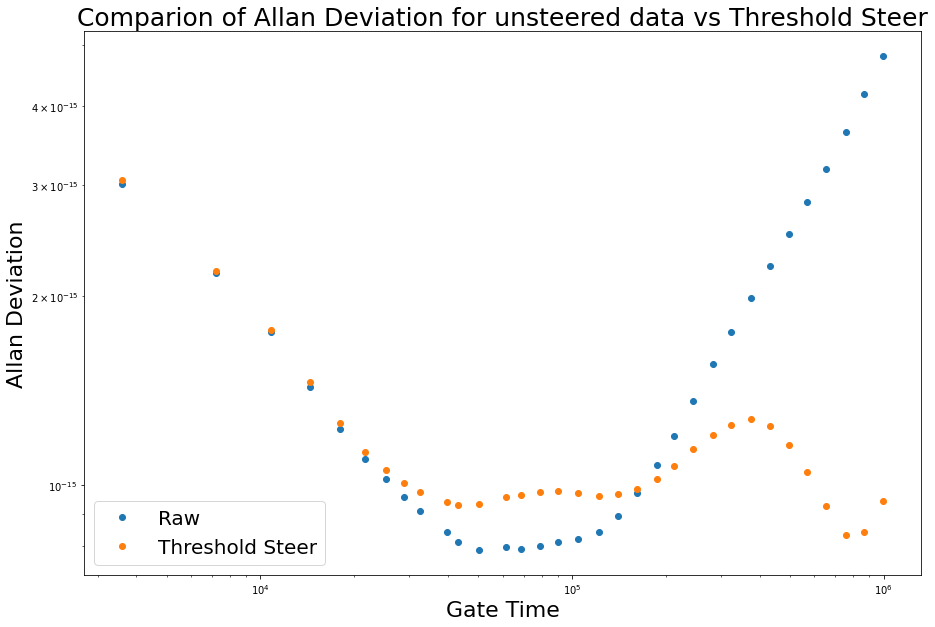

In [48]:
plt.figure(figsize=(15,10))

(t_raw, ad_raw, ade_raw, adn_raw) = at.oadev(np.array(Zoom_in_CSF['f0']),1/3600, data_type="freq",taus=np.logspace(0,6,100))
plt.loglog(t_raw,ad_raw,'o',label='Raw')

AD_th = Allan_Dev(threshold100,1/3600,np.logspace(0,6,100))

plt.xlabel('Gate Time',fontsize=22)
plt.ylabel('Allan Deviation',fontsize=22)
plt.title('Comparion of Allan Deviation for unsteered data vs Threshold Steer',fontsize=25)
plt.legend(loc=3,fontsize=20)